Arquivo de classificação para o tráfego DoS

Matheus Figueiredo de Castro

Universidade Federal do Amazonas - Fevereiro de 2024

Seleção de colunas importantes com o SHAP

In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
to_read = pd.read_csv("train70_reduced.csv", nrows=10000)   # 100000 foram selecionadas devido à limitação da máquina

print(to_read.shape)

(10000, 34)


Processamento dos dados

In [3]:
data = pd.DataFrame(to_read)

In [4]:
# divisão em duas classes

for index, row in data.iterrows():
    if row['target'] == 'dos':
        data.at[index, 'target'] = '1'
    else:
        data.at[index, 'target'] = '0'

In [5]:
print(data['target'].unique())

['0' '1']


In [6]:
# para a feature TCP Flags

for number, row in data.iterrows():                     # number represents de index of the column
    if row['tcp.flags'] == "0x00000010":                # row represents the data of the row
        data.at[number, 'tcp.flags'] = "ACK"            # the method at. update the row to the new value
    elif row['tcp.flags'] == "0x00000002":
        data.at[number, 'tcp.flags'] = "SYN"
    elif row['tcp.flags'] == "0x00000012":
        data.at[number, 'tcp.flags'] = "SYN ACK"
    elif row['tcp.flags'] == "0x00000011":
        data.at[number, 'tcp.flags'] = "FIN ACK"
    elif row['tcp.flags'] == "0x00000004":
        data.at[number, 'tcp.flags'] = "RST"
    elif row['tcp.flags'] == "0x00000014":
        data.at[number, 'tcp.flags'] = "RST ACK"
    elif row['tcp.flags'] == "0x00000018":
        data.at[number, 'tcp.flags'] = "PSH ACK"
    elif row['tcp.flags'] == "0x00000019":
        data.at[number, 'tcp.flags'] = "ZERO"

In [7]:
# para a feature MQTT Flags

for number, row in data.iterrows():                             # number represents de index of the column
    if row['mqtt.hdrflags'] == "0x00000030":                    # row represents the data of the row
        data.at[number, 'mqtt.hdrflags'] = "110000"             # the method at. update the row to the new value
    elif row['mqtt.hdrflags'] == "0x00000032":
        data.at[number, 'mqtt.hdrflags'] = "110010"
    elif row['mqtt.hdrflags'] == "0x00000040":
        data.at[number, 'mqtt.hdrflags'] = "1000000"
    elif row['mqtt.hdrflags'] == "0":
        data.at[number, 'mqtt.hdrflags'] = "0"
    elif row['mqtt.hdrflags'] == "0x00000020":
        data.at[number, 'mqtt.hdrflags'] = "100000"
    elif row['mqtt.hdrflags'] == "0x0000003a":
        data.at[number, 'mqtt.hdrflags'] = "111010"
    elif row['mqtt.hdrflags'] == "0x000000d0":
        data.at[number, 'mqtt.hdrflags'] = "11010000"
    elif row['mqtt.hdrflags'] == "0x000000c0":
        data.at[number, 'mqtt.hdrflags'] = "11000000"
    elif row['mqtt.hdrflags'] == "0x00000010":
        data.at[number, 'mqtt.hdrflags'] = "10000"
    elif row['mqtt.hdrflags'] == "0x00000090":
        data.at[number, 'mqtt.hdrflags'] = "10010000"
    elif row['mqtt.hdrflags'] == "0x00000031":
        data.at[number, 'mqtt.hdrflags'] = "110001"
    elif row['mqtt.hdrflags'] == "0x00000050":
        data.at[number, 'mqtt.hdrflags'] = "1010000"
    elif row['mqtt.hdrflags'] == "0x00000082":
        data.at[number, 'mqtt.hdrflags'] = "10000010"
    elif row['mqtt.hdrflags'] == "0x000000e0":
        data.at[number, 'mqtt.hdrflags'] = "11100000"

Reajuste de dados

In [8]:
# remoção das features que, visualmente, não são de forte influência nesse tipo de tráfego


# "to_dataset_dos" é o nome da variável apenas para a leitura dos dados sem as colunas irrelevantes, 
# pois posteriormente será necessária uma nova variável para ajustar as variáveis categóricas e tratar 
# os dados finais.

to_dataset_dos = data.drop(columns = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 
             'mqtt.conflag.willflag', 'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 
             'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.msg'])

print(to_dataset_dos.shape)

(10000, 20)


Dummies

In [9]:
# aplicação da função dummies para ajustar as variáveis categóricas com a definição
# da nova variável 

# ajuste das features sem a última coluna, que são os rótulos

feature_names = pd.get_dummies(to_dataset_dos.iloc[:,:-1])
target = to_dataset_dos['target']

print(feature_names.shape)
print(list(feature_names.keys()))

(10000, 42)
['tcp.time_delta', 'tcp.len', 'mqtt.conack.val', 'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.uname', 'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgid', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.qos', 'mqtt.ver', 'tcp.flags_ACK', 'tcp.flags_FIN ACK', 'tcp.flags_PSH ACK', 'tcp.flags_RST', 'tcp.flags_RST ACK', 'tcp.flags_SYN', 'tcp.flags_SYN ACK', 'tcp.flags_ZERO', 'mqtt.conack.flags_0', 'mqtt.conack.flags_0x00000000', 'mqtt.conflags_0', 'mqtt.conflags_0x00000002', 'mqtt.conflags_0x000000c2', 'mqtt.hdrflags_0', 'mqtt.hdrflags_10000', 'mqtt.hdrflags_100000', 'mqtt.hdrflags_1000000', 'mqtt.hdrflags_10000010', 'mqtt.hdrflags_10010000', 'mqtt.hdrflags_1010000', 'mqtt.hdrflags_110000', 'mqtt.hdrflags_11000000', 'mqtt.hdrflags_110001', 'mqtt.hdrflags_110010', 'mqtt.hdrflags_11010000', 'mqtt.hdrflags_111010', 'mqtt.protoname_0', 'mqtt.protoname_MQTT']


In [10]:
col = ['tcp.flags_ACK', 'tcp.flags_FIN ACK', 'tcp.flags_PSH ACK', 'tcp.flags_RST', 'tcp.flags_RST ACK', 'tcp.flags_SYN', 'tcp.flags_SYN ACK', 'tcp.flags_ZERO', 'mqtt.conack.flags_0', 'mqtt.conack.flags_0x00000000', 'mqtt.conflags_0', 'mqtt.conflags_0x00000002', 'mqtt.conflags_0x000000c2', 'mqtt.hdrflags_0', 'mqtt.hdrflags_10000', 'mqtt.hdrflags_100000', 'mqtt.hdrflags_1000000', 'mqtt.hdrflags_10000010', 'mqtt.hdrflags_10010000', 'mqtt.hdrflags_1010000', 'mqtt.hdrflags_110000', 'mqtt.hdrflags_11000000', 'mqtt.hdrflags_110001', 'mqtt.hdrflags_110010', 'mqtt.hdrflags_11010000', 'mqtt.hdrflags_111010', 'mqtt.protoname_0', 'mqtt.protoname_MQTT']

In [11]:
feature_names[col] = feature_names[col].replace({True: 1, False: 0})

Treinamento e ajuste de dados

In [12]:
## regressao linear

import sklearn
import shap

In [13]:
model = sklearn.linear_model.LinearRegression()

In [14]:
model.fit(feature_names, target)

LinearRegression()

In [15]:
print("Model coefficients:\n")

for i in range(feature_names.shape[1]):
    print(feature_names.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

tcp.time_delta = 2e-05
tcp.len = -0.0
mqtt.conack.val = -0.00755
mqtt.conflag.cleansess = -0.0073
mqtt.conflag.passwd = -0.02784
mqtt.conflag.uname = -0.02784
mqtt.dupflag = 0.10406
mqtt.kalive = -0.0
mqtt.len = 0.00122
mqtt.msgid = 0.0
mqtt.msgtype = -0.03017
mqtt.proto_len = -0.0292
mqtt.qos = 0.31551
mqtt.ver = -0.0292
tcp.flags_ACK = 0.20999
tcp.flags_FIN ACK = -0.11982
tcp.flags_PSH ACK = 0.19081
tcp.flags_RST = -0.11982
tcp.flags_RST ACK = -0.11982
tcp.flags_SYN = -0.11064
tcp.flags_SYN ACK = -0.11982
tcp.flags_ZERO = 0.1891
mqtt.conack.flags_0 = 0.08514
mqtt.conack.flags_0x00000000 = -0.08514
mqtt.conflags_0 = 0.0073
mqtt.conflags_0x00000002 = 0.02054
mqtt.conflags_0x000000c2 = -0.02784
mqtt.hdrflags_0 = -0.04043
mqtt.hdrflags_10000 = -0.0073
mqtt.hdrflags_100000 = -0.08514
mqtt.hdrflags_1000000 = 0.76442
mqtt.hdrflags_10000010 = -0.1231
mqtt.hdrflags_10010000 = -0.0832
mqtt.hdrflags_1010000 = -0.20265
mqtt.hdrflags_110000 = -0.27343
mqtt.hdrflags_11000000 =

In [16]:
feat100 = shap.utils.sample(feature_names, 100)

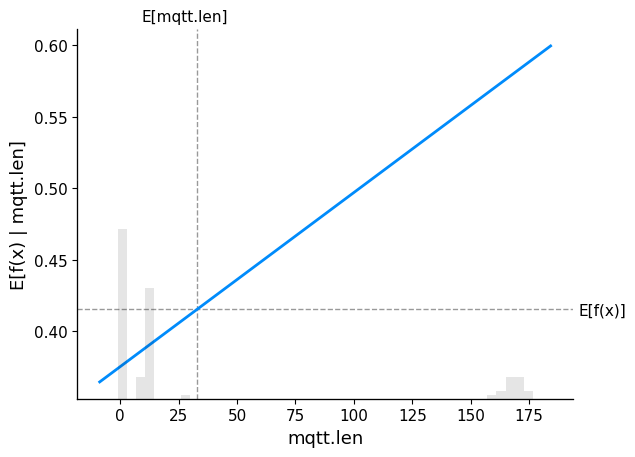

In [17]:
# grafico de dependencia parcial

shap.partial_dependence_plot(
    "mqtt.len",
    model.predict,
    feat100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [18]:
# compute the SHAP values for the linear model

explainer = shap.Explainer(model.predict, feat100)

In [19]:
shap_values = explainer(feature_names)

PermutationExplainer explainer: 10001it [03:50, 41.81it/s]                                                             


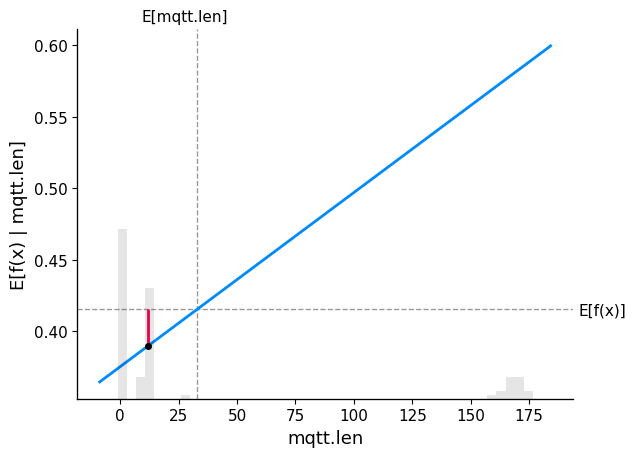

In [20]:
# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "mqtt.len",
    model.predict,
    feat100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

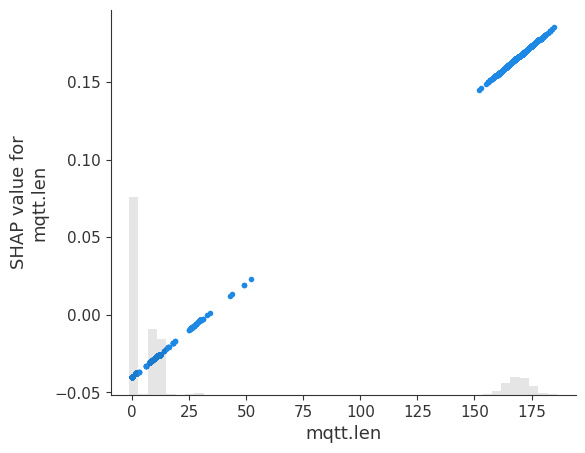

In [21]:
shap.plots.scatter(shap_values[:, "mqtt.len"])

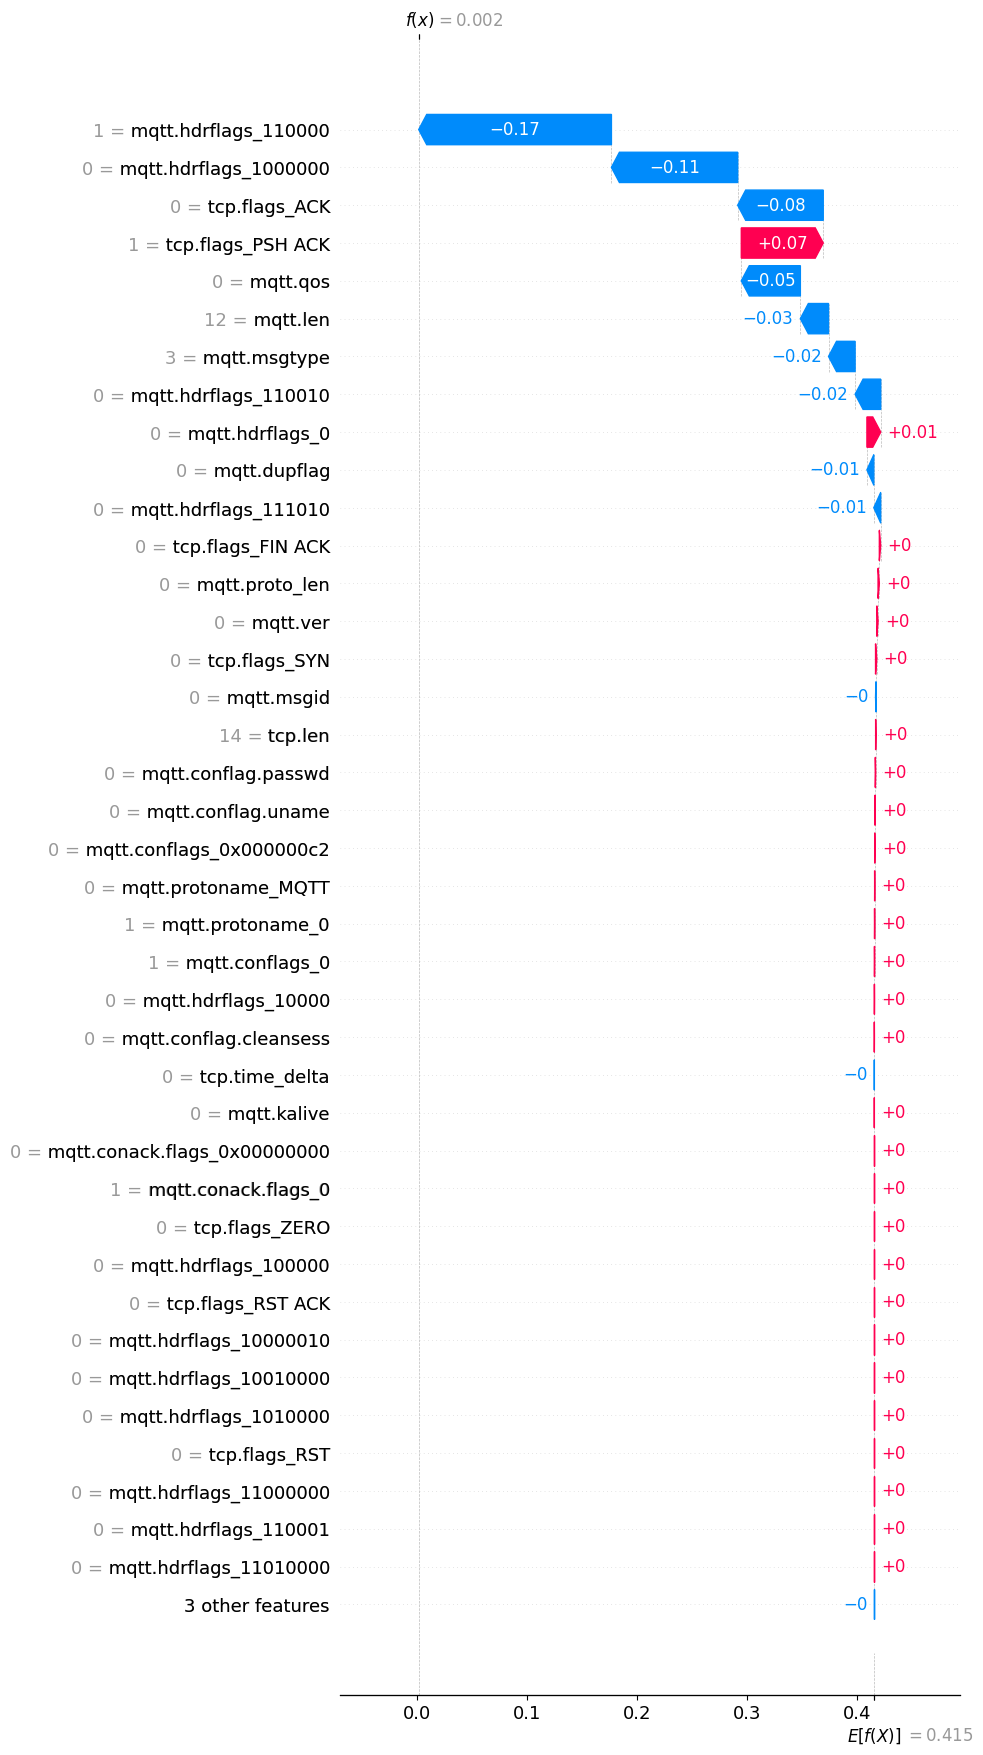

In [22]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=40)

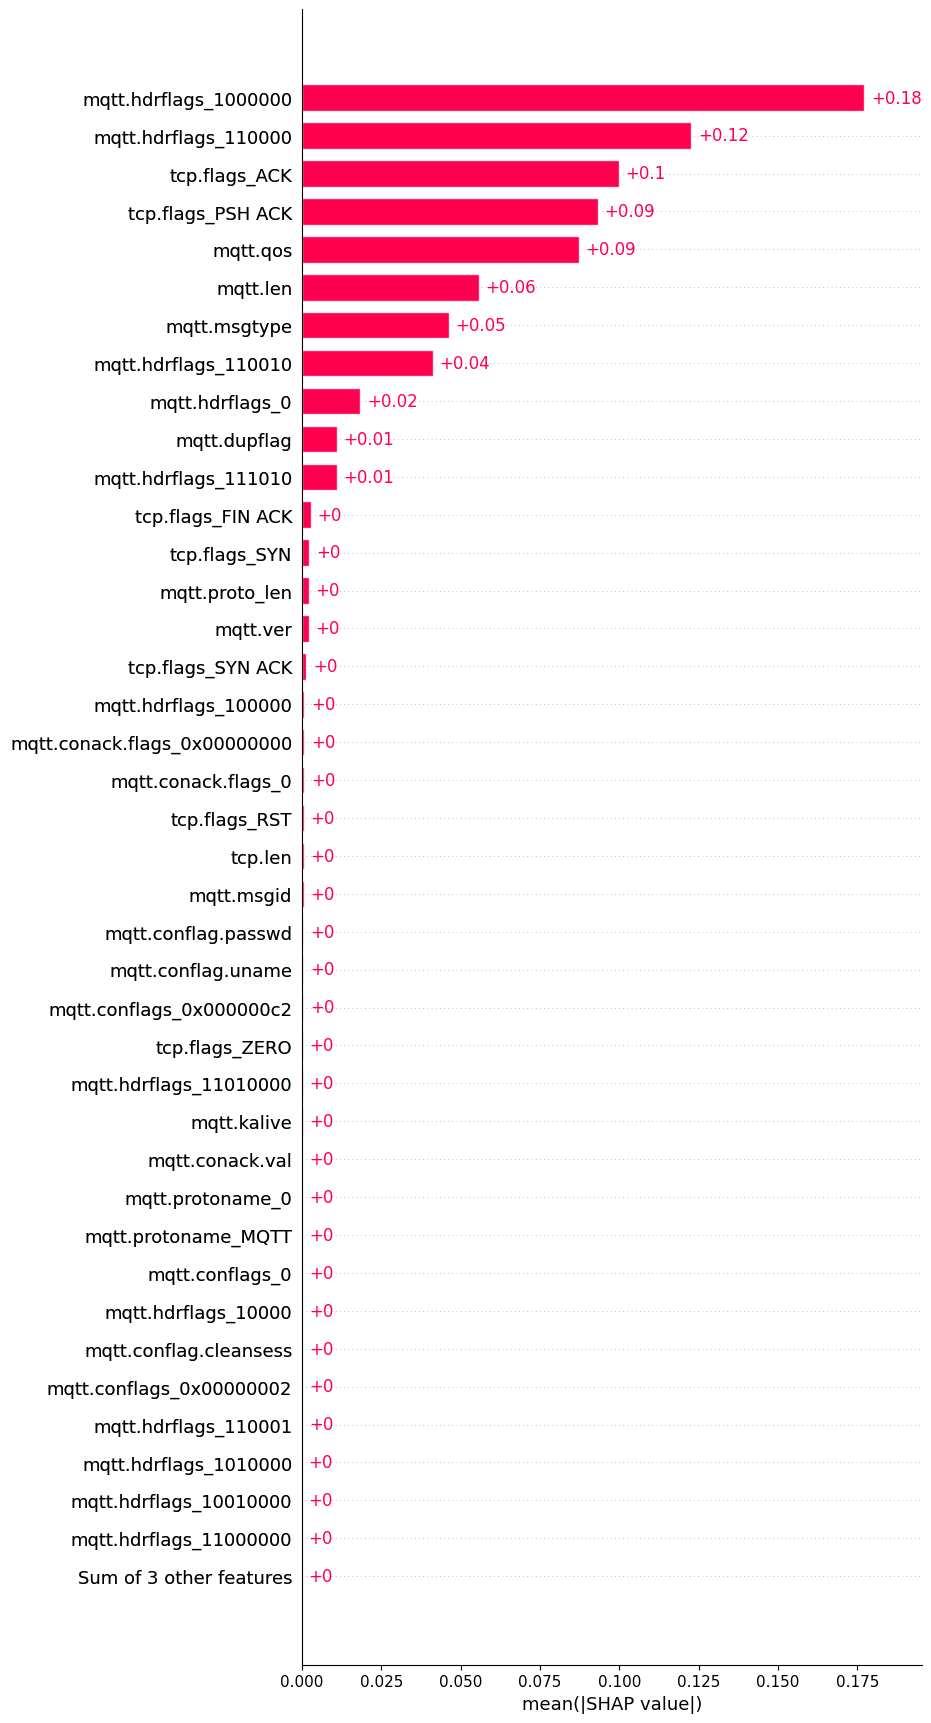

In [23]:
shap.plots.bar(shap_values, max_display=40)

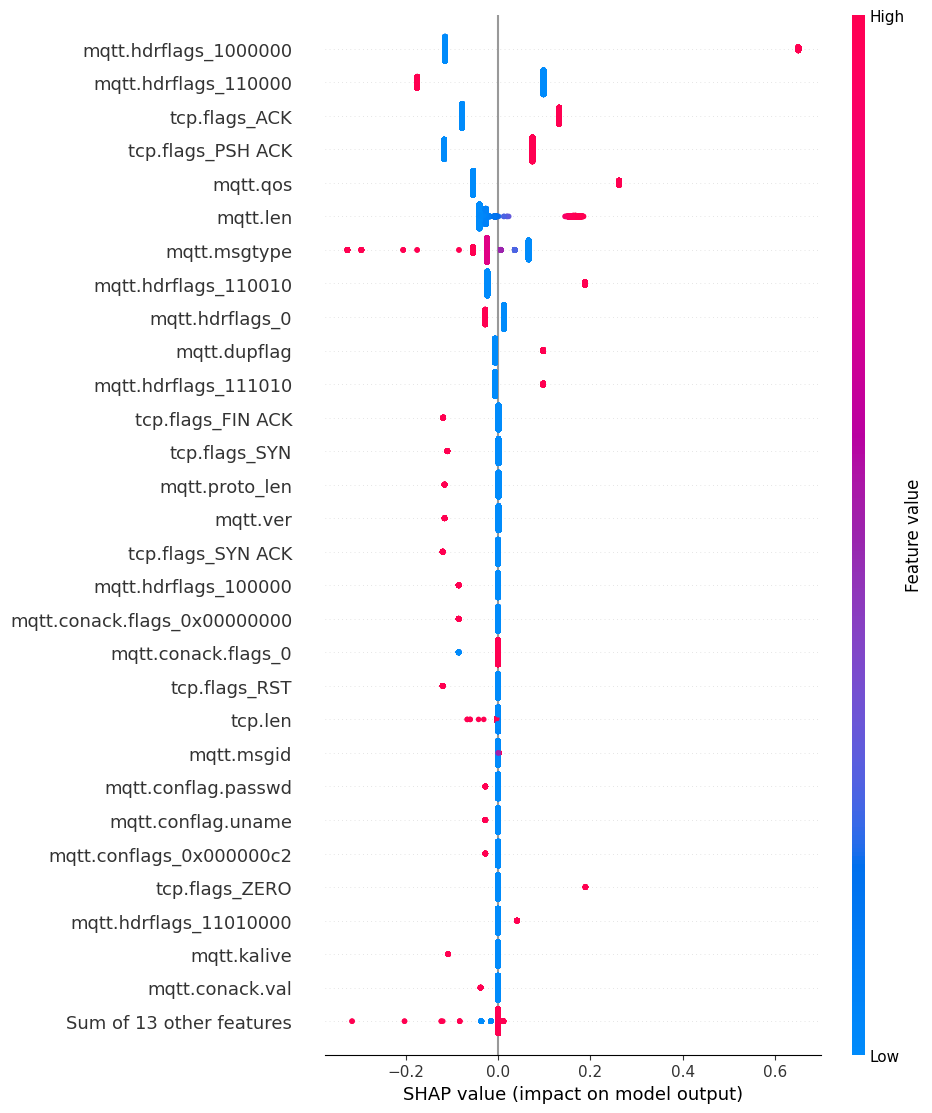

In [24]:
shap.plots.beeswarm(shap_values, max_display=30)